In [1]:
import pandas as pd
import numpy as np
import cv2
from skimage.morphology import skeletonize
from skimage.util import invert
import matplotlib.pyplot as plt
from skimage.morphology import disk, square, erosion, dilation, area_closing, remove_small_objects
import scipy.ndimage as ndi

In [41]:
# first data, read CSV + image
path = '../../Data/'
f_img = cv2.imread(path + 'ex05.jpg')
gray_f_img = cv2.cvtColor(f_img, cv2.COLOR_BGR2GRAY)
f_gt = pd.read_csv(path + 'ex05.csv', header=None)

In [42]:
f_gt

,0,1
0,589.0,1048.0
1,600.0,1520.0
2,654.0,684.0
3,679.0,692.0
4,705.0,913.0
5,708.0,631.0
6,715.0,653.0
7,736.0,964.0
8,747.0,1163.0
9,747.0,1056.0


In [43]:
def plot_img(img, gt, title):
    xs = list(gt[0])
    ys = list(gt[1])
    plt.figure(figsize=(10,8))
    plt.title(title)
    plt.imshow(img, cmap='gray')
    for idx in range(len(xs)):
        j, i = ys[idx], xs[idx]
        plt.scatter(j, i, color='r')
    plt.show()

In [44]:
gray_f_img

array([[ 37,  36,  34, ..., 135, 133, 132],
       [ 37,  36,  34, ..., 134, 132, 131],
       [ 36,  36,  35, ..., 132, 131, 130],
       ...,
       [ 90,  88,  86, ..., 128, 126, 126],
       [ 90,  88,  86, ..., 131, 129, 128],
       [ 90,  88,  86, ..., 135, 133, 132]], dtype=uint8)

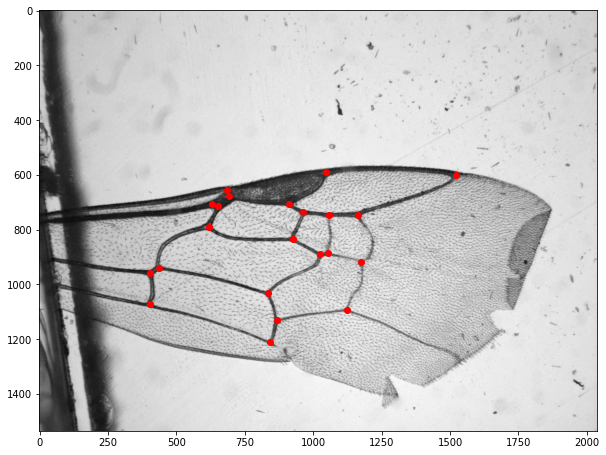

In [45]:
plot_img(gray_f_img, f_gt, title='')

In [46]:
from skimage.exposure import rescale_intensity

In [57]:
p1, p2 = np.percentile(gray_f_img, (10, 95))
gray_img_rescale = rescale_intensity(gray_f_img, in_range=(p1, p2))

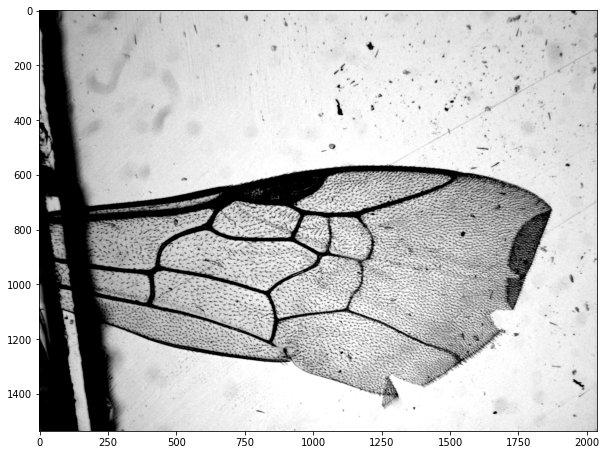

In [58]:
plt.figure(figsize=(10, 8))
plt.imshow(gray_img_rescale, cmap='gray')
plt.show()

In [61]:
# threshold image
threshold_val = 100
ret, img = cv2.threshold(gray_img_rescale, threshold_val, 255, 0)

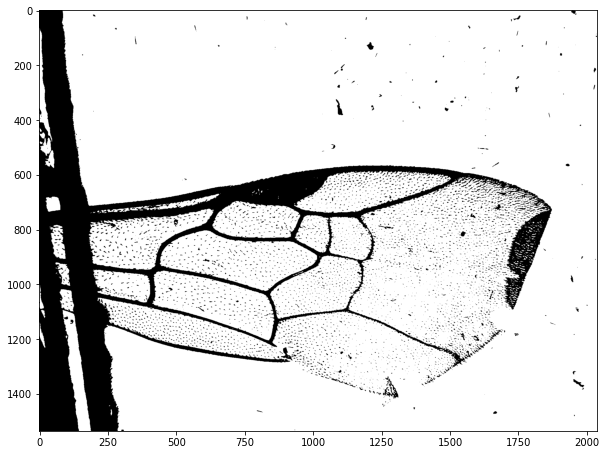

In [62]:
plt.figure(figsize=(10, 8))
plt.imshow(img, cmap='gray')
plt.show()

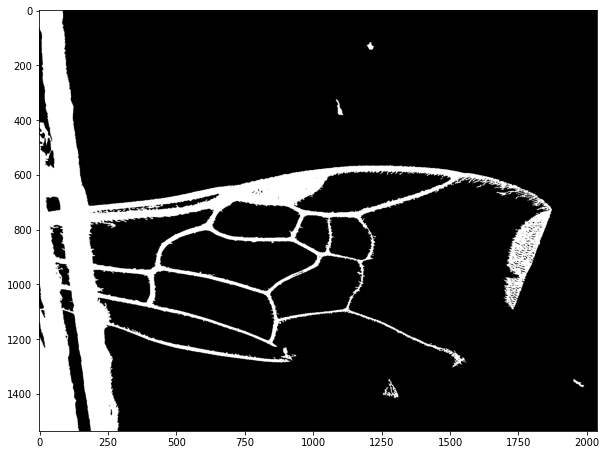

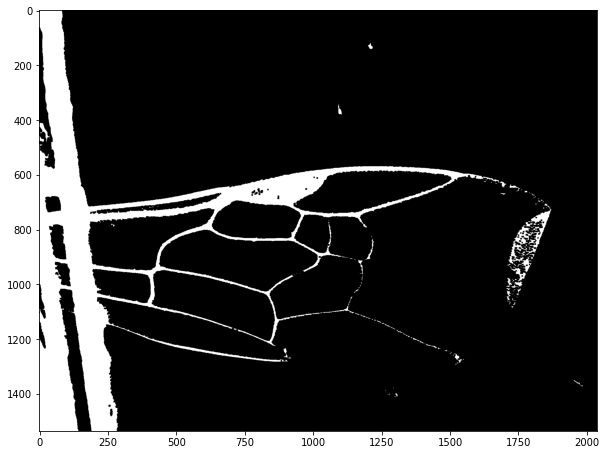

In [79]:
#tmp = remove_small_objects(img, min_size=10)
image = invert(img)
tmp_bin = (image > 0).copy()
tmp = remove_small_objects(tmp_bin, min_size=300)

plt.figure(figsize=(10, 8))
plt.imshow(tmp, cmap='gray')
plt.show()

tmp = erosion(tmp, square(5))
plt.figure(figsize=(10, 8))
plt.imshow(tmp, cmap='gray')
plt.show()

# tmp = erosion(image, disk(3))
# plt.figure(figsize=(10, 8))
# plt.imshow(tmp, cmap='gray')
# plt.show()

# tmp = dilation(tmp, disk(7))
# plt.figure(figsize=(10, 8))
# plt.imshow(tmp, cmap='gray')
# plt.show()

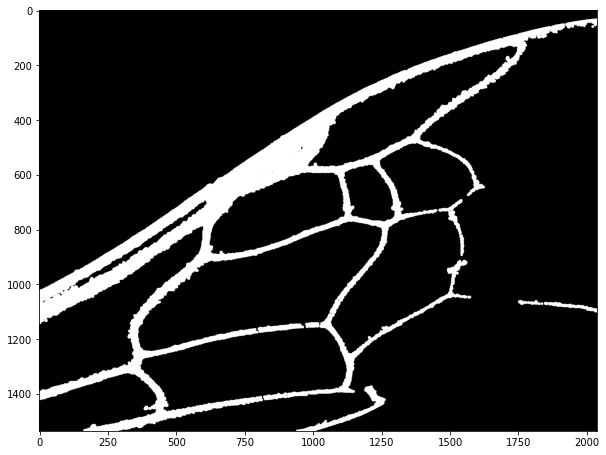

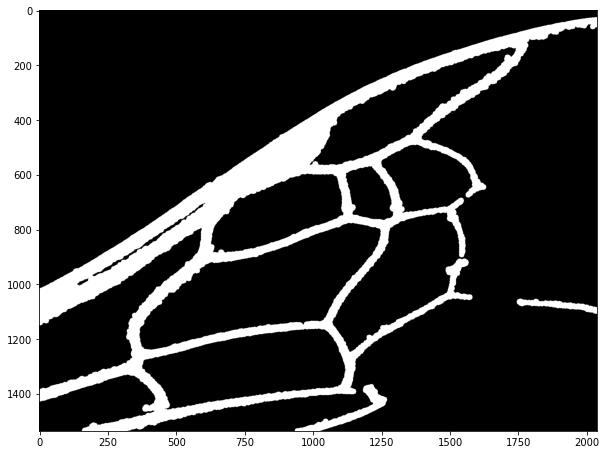

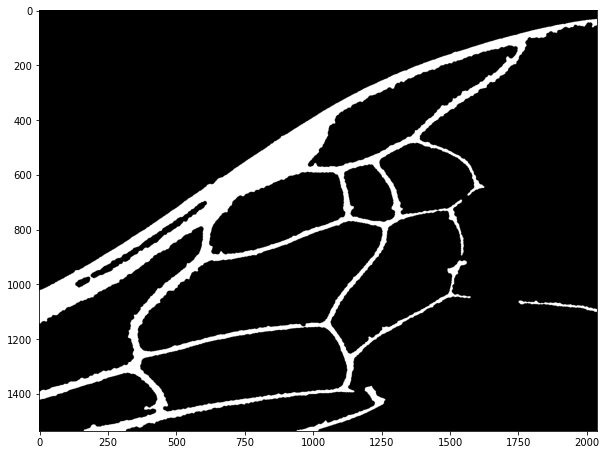

In [10]:
# remove small circle objects
tmp_bin = (tmp > 0).copy()
tmp_bin = remove_small_objects(tmp_bin, min_size=800)
plt.figure(figsize=(10, 8))
plt.imshow(tmp_bin, cmap='gray')
plt.show()

# apply little dilation
tmp_bin = dilation(tmp_bin, disk(5))
plt.figure(figsize=(10, 8))
plt.imshow(tmp_bin, cmap='gray')
plt.show()

# apply erosion
tmp_bin = erosion(tmp_bin, disk(7))
plt.figure(figsize=(10, 8))
plt.imshow(tmp_bin, cmap='gray')
plt.show()

In [11]:
# image = invert(img)
# plt.figure(figsize=(10,8))
# plt.imshow(image, cmap='gray')
# plt.show()

# plt.figure(figsize=(10, 8))
# tmp = erosion(image, square(3))
# plt.imshow(tmp, cmap='gray')
# plt.show()

# tmp = dilation(tmp, square(5))
# plt.figure(figsize=(10, 8))
# plt.imshow(tmp, cmap='gray')
# plt.show()

# #tmp = erosion(tmp, disk(3))
# tmp = dilation(tmp, square(4))

# plt.figure(figsize=(10, 8))
# plt.imshow(tmp, cmap='gray')
# plt.show()
# tmp = tmp > 0
# tmp = remove_small_objects(tmp, min_size=200)
# tmp = dilation(tmp, square(3))

# plt.figure(figsize=(10, 8))
# plt.imshow(tmp, cmap='gray')
# plt.show()

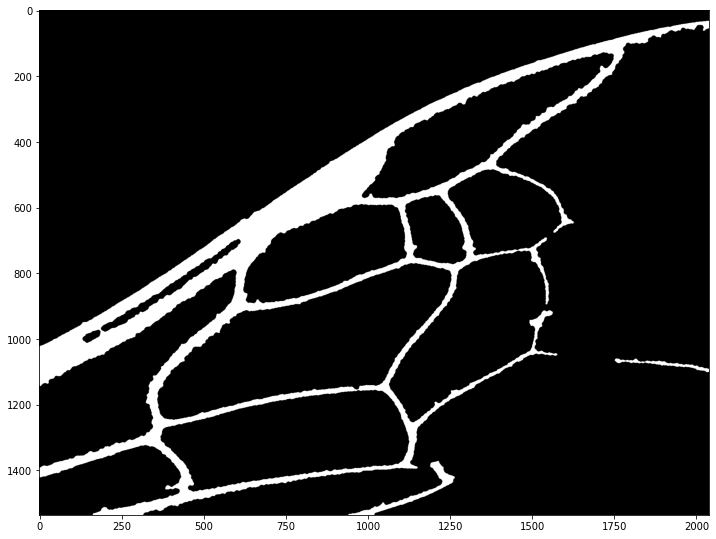

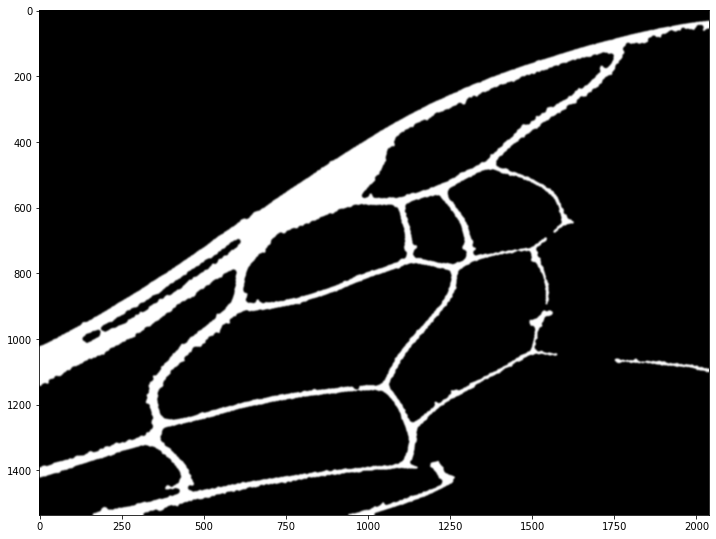

In [56]:
tmp = tmp_bin.copy()
tmp = tmp.astype(np.float32)
# plt.figure(figsize=(12,10))
# plt.imshow(tmp, cmap='gray')
# plt.show()

#blur = cv2.medianBlur(tmp, 5)

plt.figure(figsize=(12,10))
plt.imshow(tmp, cmap='gray')
plt.show()

blur2 = cv2.blur(blur, (5, 5))

plt.figure(figsize=(12, 10))
plt.imshow(blur, cmap='gray')
plt.show()

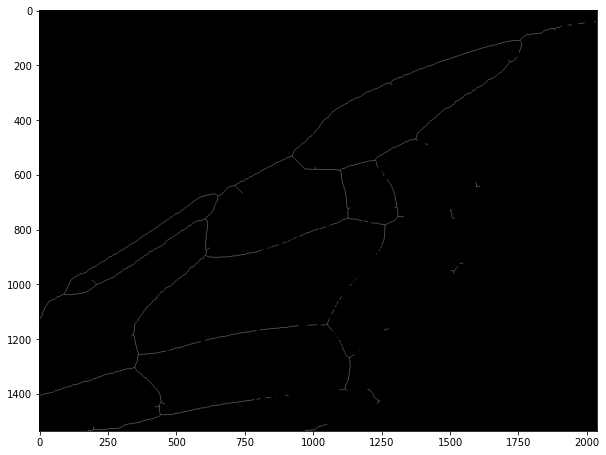

In [57]:
# perform skeletonization
skeleton = skeletonize(blur)
plt.figure(figsize=(10,8))
plt.imshow(skeleton, cmap='gray')
plt.show()

In [48]:
branches = np.zeros_like(skeleton, dtype=bool)
branches.shape

(1536, 2039)

In [49]:
selems = list()
selems.append(np.array([[0, 1, 0], [1, 1, 1], [0, 0, 0]]))
selems.append(np.array([[1, 0, 1], [0, 1, 0], [1, 0, 0]]))
selems.append(np.array([[1, 0, 1], [0, 1, 0], [0, 1, 0]]))
selems.append(np.array([[0, 1, 0], [1, 1, 0], [0, 0, 1]]))
selems.append(np.array([[0, 0, 1], [1, 1, 1], [0, 1, 0]]))
selems = [np.rot90(selems[i], k=j) for i in range(5) for j in range(4)]

selems.append(np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
selems.append(np.array([[1, 0, 1], [0, 1, 0], [1, 0, 1]]))

In [50]:
for selem in selems:
    branches |= ndi.binary_hit_or_miss(skeleton, selem)

In [51]:
np.unique(branches)

array([False,  True])

In [52]:
res = np.where(branches == True)
res

(array([  68,  111,  188,  266,  470,  533,  547,  580,  585,  639,  642,
         679,  718,  723,  730,  753,  758,  762,  784,  876,  894,  951,
        1000, 1036, 1146, 1183, 1256, 1268, 1304, 1381, 1427, 1446, 1476,
        1504, 1530]),
 array([1884, 1756, 1720, 1283, 1377,  925, 1228, 1008, 1101,  715, 1599,
         654, 1306, 1129, 1504, 1311, 1128,  608, 1263,  611,  609, 1516,
         209,   93, 1053,  345,  363, 1134,  349, 1117, 1240,  439,  444,
         366,  199]))

In [53]:
# build pandas datafram
data = {
    0: list(res[0]),
    1: list(res[1])
}
df_res = pd.DataFrame(data)

In [54]:
df_res

,0,1
0,68,1884
1,111,1756
2,188,1720
3,266,1283
4,470,1377
5,533,925
6,547,1228
7,580,1008
8,585,1101
9,639,715


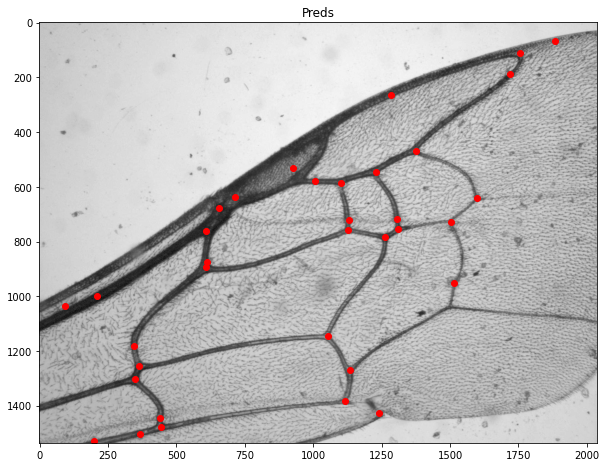

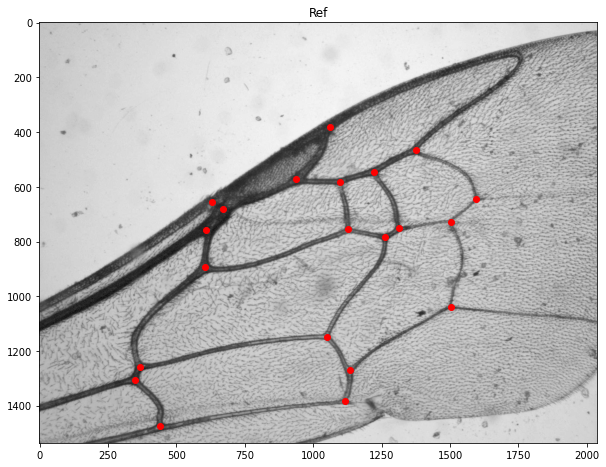

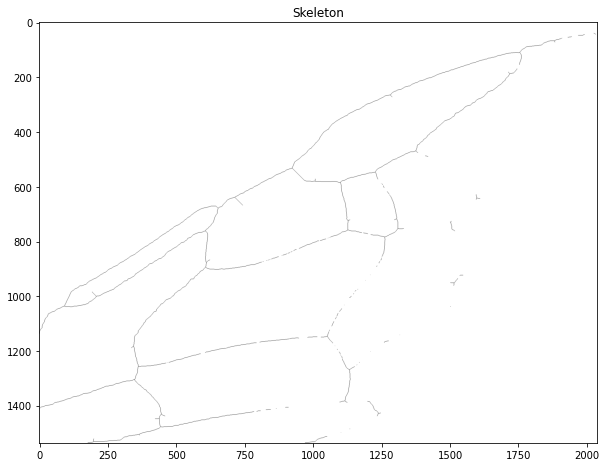

In [55]:
plot_img(gray_f_img, df_res, title='Preds')
plot_img(gray_f_img, f_gt, title='Ref')

plt.figure(figsize=(10,8))
plt.title('Skeleton')
plt.imshow(np.invert(skeleton), cmap='gray')
plt.show()

In [13]:
i, j = list(f_gt.iloc[10])
i, j = int(i), int(j)
i, j

(756, 1128)

In [14]:
skeleton = invert(skeleton)

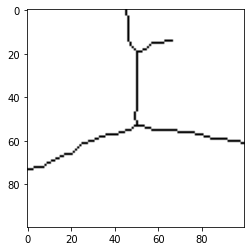

In [15]:
win_size=50
template_1 = skeleton[i-win_size:i+win_size, j-win_size:j+win_size]
plt.imshow(template_1, cmap='gray')
plt.show()

In [16]:
template_1

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [17]:
skeleton = skeleton.astype(np.float32)
skeleton

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)

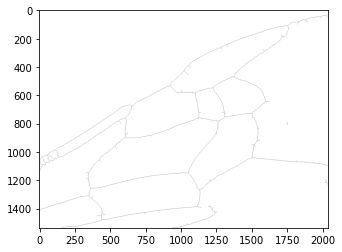

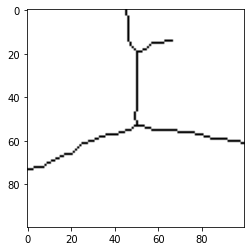

In [18]:
plt.imshow(skeleton, cmap='gray')
plt.show()
plt.imshow(template_1, cmap='gray')
plt.show()

In [19]:
template_1

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

None
None


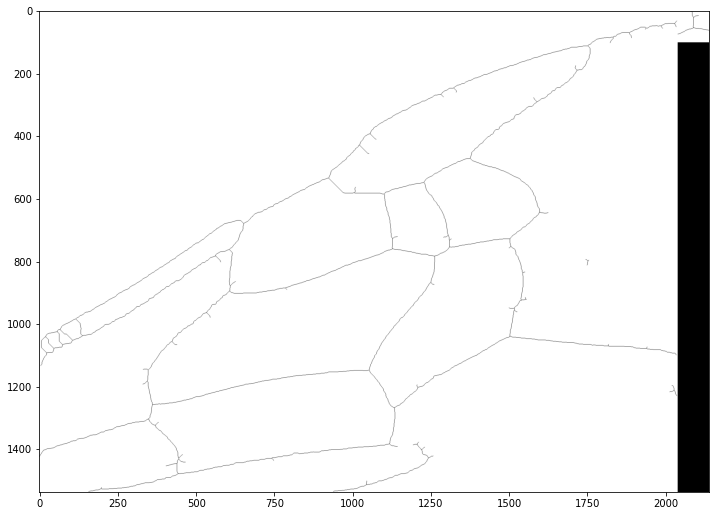

In [332]:

#rgb_skeleton = cv2.cvtColor(skeleton, cv2.COLOR_GRAY2BGR)
#template = template_1.astype(np.float32)
#template = cv2.cvtColor(template, cv2.COLOR_GRAY2BGR)

# orb = cv2.ORB_create()
# kp1, des1 = orb.detectAndCompute(rgb_skeleton, None)
# kp2, des2 = orb.detectAndCompute(template, None)

# Initiate SIFT detector
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
#rgb_skeleton *= 255.0
rgb_skeleton = rgb_skeleton.astype(np.uint8)
kp1, des1 = sift.detectAndCompute(rgb_skeleton, None)

#template *= 255.0
template = template.astype(np.uint8)
kp2, des2 = sift.detectAndCompute(template, None)

print(des1)
print(des2)

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
        
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(rgb_skeleton, kp1, template, kp2, good,
                         None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(12,10))
plt.imshow(img3)
plt.show()
        
# matches = bf.match(des1, des2)
# matches = sorted(matches, key = lambda x:x.distance)


# img3 = cv2.drawMatches(rgb_skeleton, kp1, template,
#                        kp2, matches[:30], None,
#                        flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# plt.figure(figsize=(12,10))
# plt.imshow(img3)
# plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


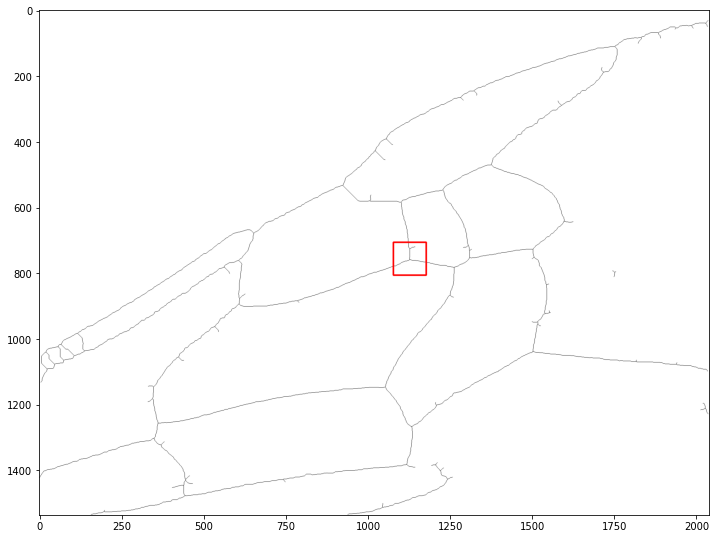

In [311]:
skeleton2 = skeleton.copy()
w = template_1.shape[1]
h = template_1.shape[0]
template = template_1.astype(np.float32)

methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
           'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

method = cv2.TM_CCOEFF_NORMED

img = skeleton2.copy()

# Apply template Matching
res = cv2.matchTemplate(img, template, method)
output = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR);

threshold = 0.5
loc = np.where(res >= threshold)

for pt in zip(*loc[::-1]):
    cv2.rectangle(output, pt, (pt[0] + w, pt[1] + h), (255, 0, 0), 3)
    
plt.figure(figsize=(12, 10))
plt.imshow(output)
plt.show()

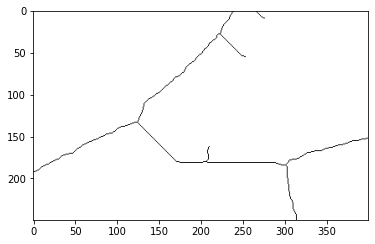

In [281]:
plt.imshow(skeleton2[400:650, 800:1200], cmap='gray')
plt.show()

In [132]:
dst = cv2.cornerHarris(skeleton, blockSize=2, ksize=3, k=0.7)
dst

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

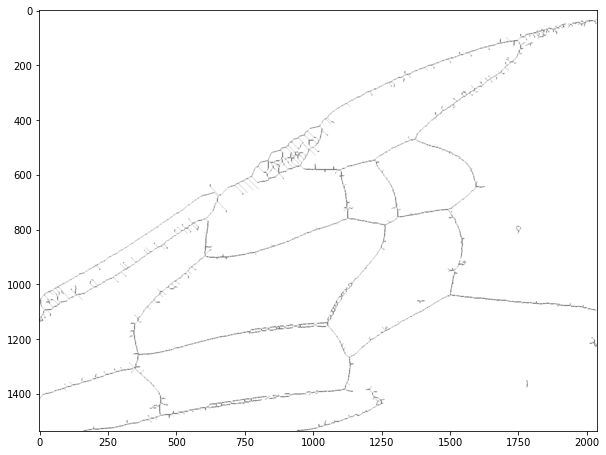

In [145]:
plt.figure(figsize=(10,8))
plt.imshow(dst, cmap='gray')
plt.show()

In [106]:
# try Harris corner detector
#gray_f_img = np.float32(gray_f_img)
gray_f_img.dtype, gray_f_img.shape

(dtype('float32'), (1536, 2048))

In [138]:
dst = cv2.cornerHarris(gray_f_img, blockSize=2, ksize=3, k=0.7)
dst

array([[-1.12879684e+02, -1.12879684e+02, -2.73757801e+01, ...,
        -2.17480451e-01, -5.17578097e-03,  0.00000000e+00],
       [-1.12879684e+02, -1.12879684e+02, -2.73757801e+01, ...,
        -2.17480451e-01, -5.17578097e-03,  0.00000000e+00],
       [-2.31207809e+02, -2.31207809e+02, -1.54988571e+02, ...,
        -2.47851551e-01, -1.75781245e-03,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -3.59914883e+04, -3.22508047e+04, -3.59540156e+04],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -5.71268398e+04, -1.46771807e+04, -3.10260625e+04],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -3.06891875e+04, -7.87063232e+02, -8.76800781e+02]], dtype=float32)

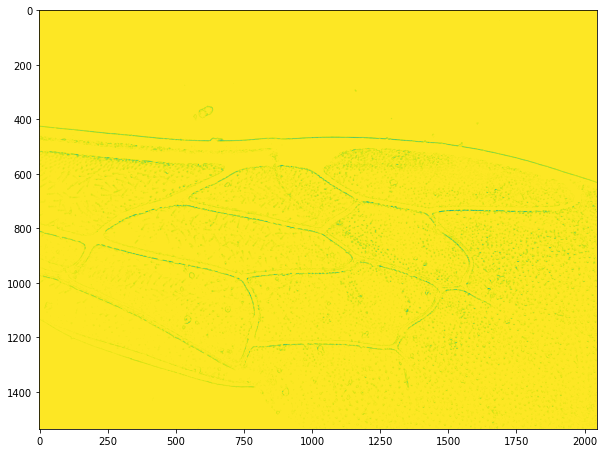

In [140]:
plt.figure(figsize=(10,8))
plt.imshow(dst)

In [141]:
# TODO
# 8-connectivity neighbors
# Skeletonization (cv2.ximgproc.thinning)

# links
# https://answers.opencv.org/question/228131/detection-of-blood-vessels-junctions/
# https://docs.opencv.org/3.4/d1/dc5/tutorial_background_subtraction.html
# https://answers.opencv.org/question/228567/checking-for-numbers-of-blood-vessels-junctions-detected/
# https://github.com/kasturijoshi06/Blood-vessel-extraction-and-microaneurysm-detection-in-retinal-images/blob/master/bloodvesselextraction.py